In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

#dataset contains images of size 32x32x3 pixels, classified into 43 classes

#Loading Data

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, Y_train = train['features'], train['labels']

In [4]:
X_test, Y_test = test['features'], test['labels']

In [5]:
X_validate, Y_validate = valid['features'], valid['labels']

#Data Visualisation

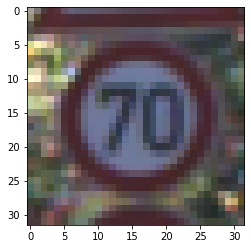

4


In [6]:
i = np.random.randint(0, len(X_train))
plt.imshow(X_train[i])
plt.show()
print(Y_train[i])

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_validate.shape)
print(Y_validate.shape)

(34799, 32, 32, 3)
(34799,)
(12630, 32, 32, 3)
(12630,)
(4410, 32, 32, 3)
(4410,)


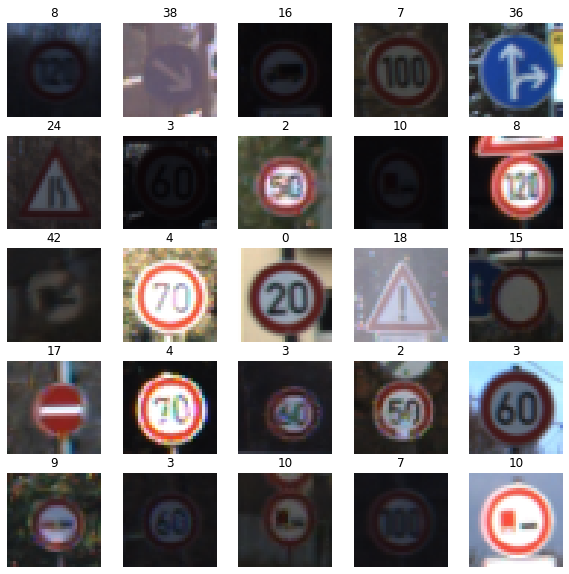

In [8]:
#Creating A Grid

# subplot returns the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(5, 5, figsize = (10,10))

axes = axes.ravel() #flatten the 5 x 5 matrix into 25 array

n_training = len(X_train)

for i in range(0, 25):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.2)

#Converting images to grayscale & Normalisation

In [9]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

In [10]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
print(X_train_gray.shape)
X_train_gray_norm = (X_train_gray - 128)/128

(34799, 32, 32, 1)


In [11]:
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_test_gray_norm = (X_test_gray - 128)/128

In [12]:
X_validate_gray = np.sum(X_validate/3, axis = 3, keepdims = True)
X_validate_gray_norm = (X_validate_gray - 128)/128

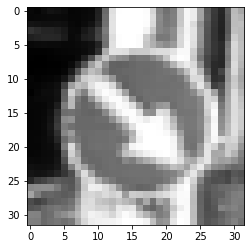

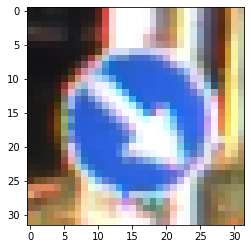

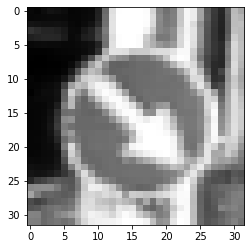

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

#Building Neural Network Model

In [15]:
from tensorflow.keras import datasets, layers, models

In [16]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Dropout(0.2))
CNN.add(layers.Conv2D(16, (5,5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation="relu"))
CNN.add(layers.Dense(84, activation="relu"))
CNN.add(layers.Dense(43, activation="softmax"))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

#Compiling and training deep CNN model 

In [17]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = CNN.fit(X_train_gray_norm, 
                  Y_train,
                 batch_size=500,
                 epochs=25,
                 verbose=1,
                 validation_data = (X_validate_gray_norm, Y_validate))

Epoch 1/25
70/70 [==============================] - 14s 201ms/step - loss: 3.2824 - accuracy: 0.1360 - val_loss: 2.9602 - val_accuracy: 0.2469
Epoch 2/25
70/70 [==============================] - 12s 172ms/step - loss: 2.0926 - accuracy: 0.4221 - val_loss: 1.7023 - val_accuracy: 0.5122
Epoch 3/25
70/70 [==============================] - 14s 194ms/step - loss: 1.3288 - accuracy: 0.6087 - val_loss: 1.1933 - val_accuracy: 0.6315
Epoch 4/25
70/70 [==============================] - 12s 171ms/step - loss: 0.9851 - accuracy: 0.7070 - val_loss: 0.9397 - val_accuracy: 0.7349
Epoch 5/25
70/70 [==============================] - 12s 165ms/step - loss: 0.7868 - accuracy: 0.7697 - val_loss: 0.7664 - val_accuracy: 0.7887
Epoch 6/25
70/70 [==============================] - 12s 175ms/step - loss: 0.6515 - accuracy: 0.8062 - val_loss: 0.6963 - val_accuracy: 0.7982
Epoch 7/25
70/70 [==============================] - 13s 189ms/step - loss: 0.5348 - accuracy: 0.8426 - val_loss: 0.6347 - val_accuracy: 0.8170

#Assessing Trained Model Performance

In [21]:
score = CNN.evaluate(X_test_gray_norm, Y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 2s 4ms/step - loss: 0.6286 - accuracy: 0.8875
Test Accuracy: 0.8874900937080383


In [23]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

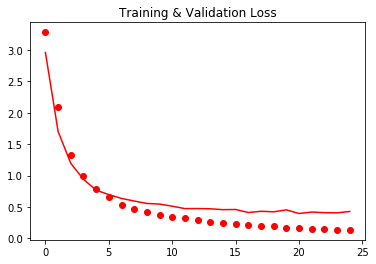

In [26]:
epochs = [i for i in range(len(loss))]
plt.plot(epochs, loss, 'ro', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training & Validation Loss")
plt.show()

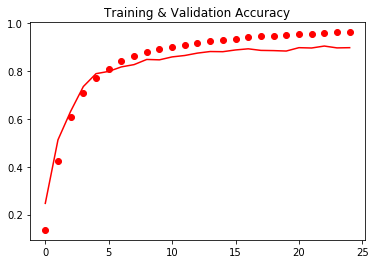

In [27]:
plt.plot(epochs, accuracy, 'ro', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'r', label="Validation Accuracy")
plt.title("Training & Validation Accuracy")
plt.show()

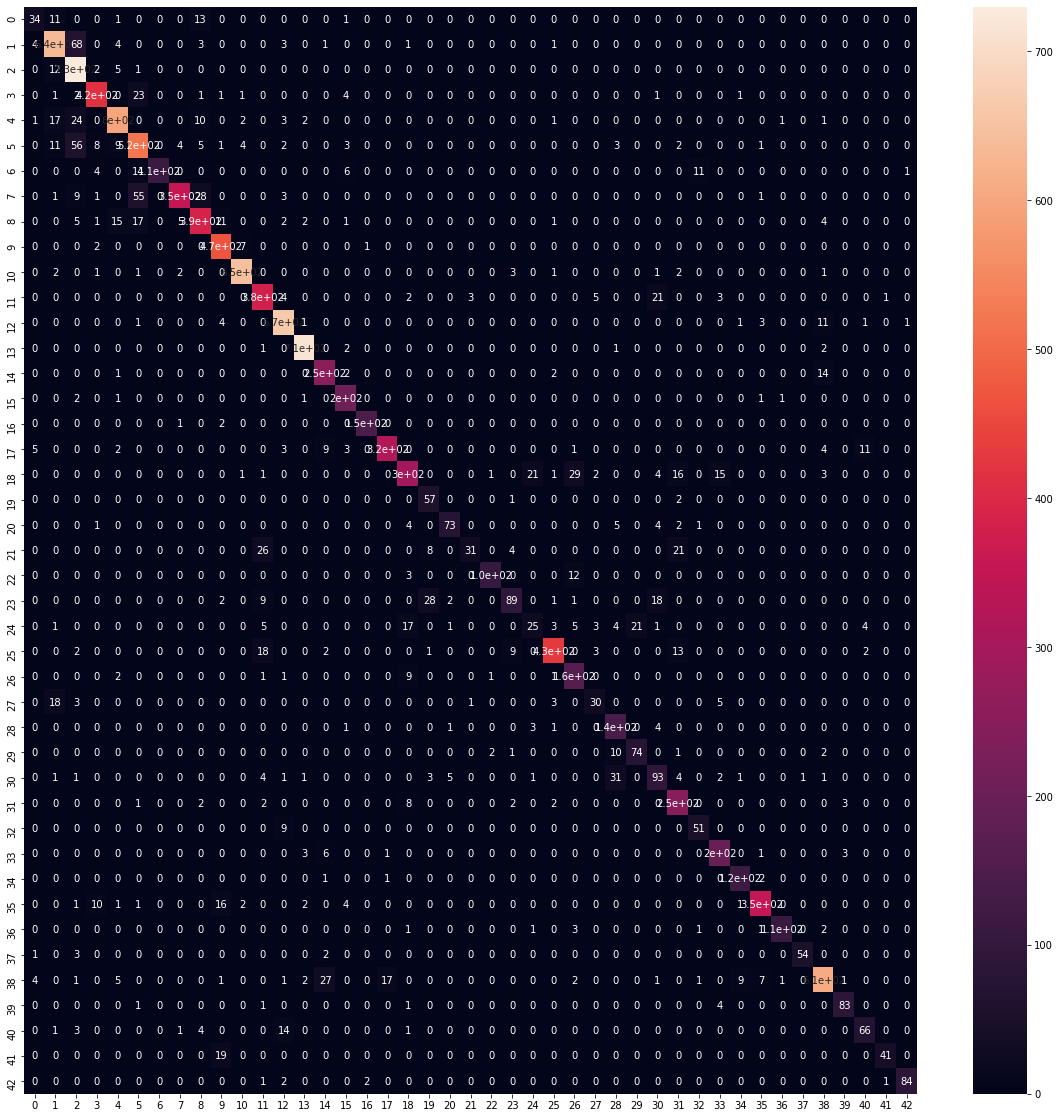

In [31]:
# predicted_classes = CNN.predict_classes(X_test_gray_norm)
predicted = np.argmax(CNN.predict(X_test_gray_norm), axis=-1)
Y_true = Y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true, predicted)
plt.figure(figsize = (20, 20))
sns.heatmap(cm, annot = True)

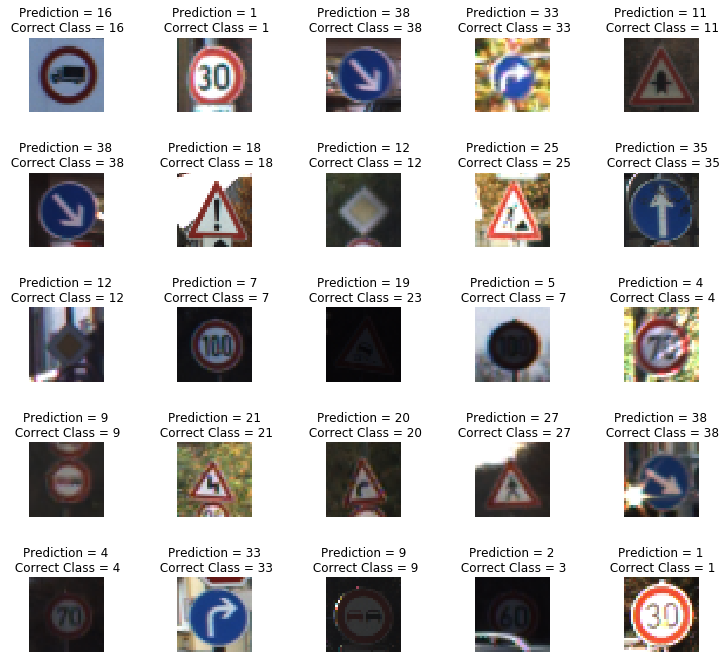

In [32]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    #index = np.random.randint(0, 4000)
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n Correct Class = {}'.format(predicted[i], Y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

#CLASS VALUES

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [33]:
#END